In [1]:
#Q1(i)
import logging
from numpy.random import RandomState
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn.decomposition import PCA
import pandas as pd
rng = RandomState(0)
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
faces, classes = fetch_olivetti_faces(return_X_y=True, shuffle=False, random_state=rng)
faces = faces[:100]
classes = classes[:10]
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
print("Dataset consists of %d faces" % n_samples)
olivetti = fetch_olivetti_faces()
x = olivetti.data
y = olivetti.target
df = pd.DataFrame(olivetti.data)
df['target'] = pd.Series(olivetti.target)
olivetti_df = pd.DataFrame(olivetti.data)
np.random.shuffle(faces)
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)









downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset consists of 100 faces


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /tmp/data/
Dataset consists of 400 64x64 faces
Means:  [2.7619079e-05 1.3405096e-04 1.7250009e-04 1.8477335e-04 2.9931319e-04]


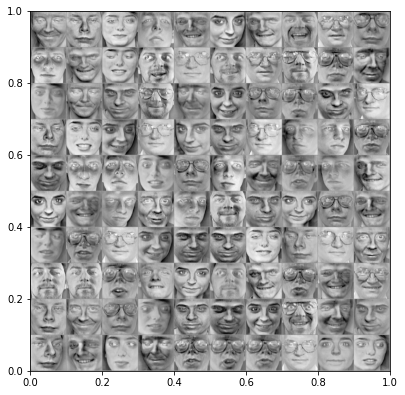

examples:  100
n_rows:  10
n_cols:  10
example width:  64
example height: 64
(6, 4096)


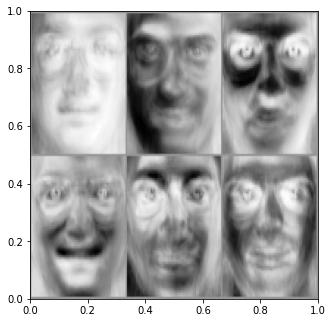

examples:  6
n_rows:  2
n_cols:  3
example width:  64
example height: 64


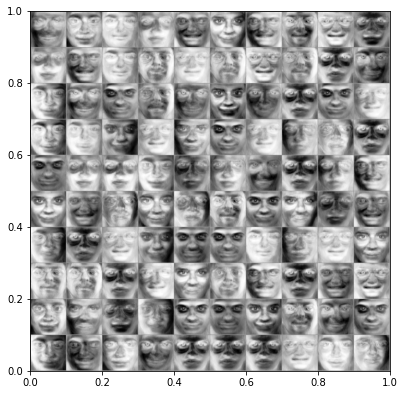

examples:  100
n_rows:  10
n_cols:  10
example width:  64
example height: 64
0.8708948073908687
0.9578913480509073
0.9951286532450467
1.0059047903632745
1.0094016721996062


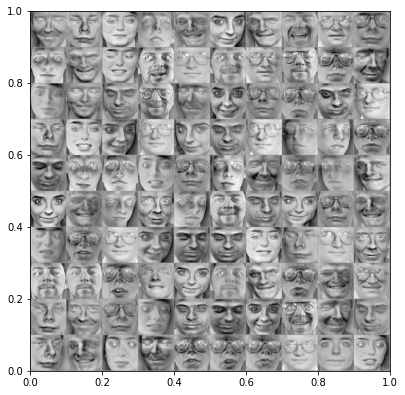

examples:  100
n_rows:  10
n_cols:  10
example width:  64
example height: 64
32


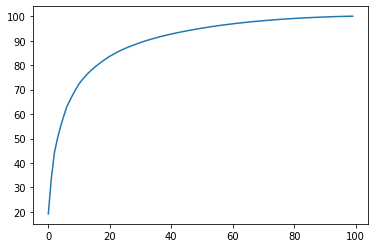

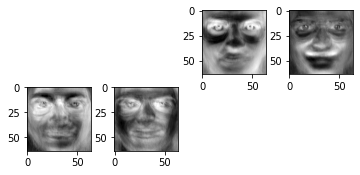

In [2]:
#Q1(ii)
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
def displayData(data, *width):
    if width:
        ex_width = width[0]
    else:
        ex_width = int(np.sqrt(np.shape(data)[1]));
    (n_examples, n) = np.shape(data);
    ex_height = int(n / ex_width);
    n_rows = int(np.floor(np.sqrt(n_examples)));
    n_cols = int(np.ceil(n_examples / n_rows));
    pad = 1;
    grid = np.zeros( (pad + n_rows * (ex_height + pad),
                                pad + n_cols * (ex_width + pad)) );    
    cur = 0; 
    for j in range(0, n_rows):
        if cur >= n_examples: break;
        for i in range(0, n_cols):
            if cur >= n_examples: break;
            max_val = np.max(np.abs(data[cur, :]));
            from_row = pad + j * (ex_height + pad); to_row = from_row + ex_height;
            from_col = pad + i * (ex_width + pad); to_col = from_col + ex_width;
            grid[from_row:to_row,from_col:to_col] = \
                data[cur, :].reshape( (ex_height, ex_width) ) / max_val;
            cur += 1;
    if(n_examples<100):
        fig = plt.figure();
    else:
        fig = plt.figure(figsize=(n_examples/10,n_examples/20));
    ax = fig.add_axes([0, 0, 1, 1]);
    ax.imshow((-1)*grid, extent=[0, 1, 0, 1], cmap='Greys');
    plt.show();
    print('examples: ',n_examples);
    print('n_rows: ', n_rows);
    print('n_cols: ', n_cols);
    print('example width: ', ex_width);
    print('example height:', ex_height);
dataset = fetch_olivetti_faces(data_home='/tmp/data/', shuffle=False)
n_samples, width, height = dataset.images.shape
print("Dataset consists of {n} {w}x{h} faces".format(n=n_samples, w=width, h=height))
dataset.keys()
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
preprocessing = Pipeline([
    ('scaler', StandardScaler()),   
    ('normalizer', Normalizer()),
])
preprocessing.fit(faces)
X = preprocessing.transform(faces)
print('Means: ', X.mean(axis=0)[0:5])
displayData(X[:100,:],64)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
U = pca.components_
print(U.shape)
displayData(U, width)
Z = pca.transform(X)
X_recover = pca.inverse_transform(Z)
displayData(X_recover[:100,:])
sum(pca.explained_variance_)
pca = PCA(n_components=25).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=50).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=75).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=90).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=100).fit(X)
print(sum(pca.explained_variance_))
Z = pca.transform(X)
X_recover = pca.inverse_transform(Z)
displayData(X_recover[:100,:])
def show_images( images, num_images_to_show ):
    fig = plt.figure()
    for i in range(3,7):
        fig.add_subplot(3,num_images_to_show,i)
        img = np.reshape( images[:,i-1], (64,64) )
        plt.imshow(img, cmap='gray')
class PCA:
    def __init__( self, optimize = False ):
        self.__optimize = optimize
        
    def __calculate_covariance_matrix( self, X ):
        if self.__optimize:
            return X @ X.T
        else:
            return X.T @ X

    def __get_eigenvecs_sorted_by_eigenvals( self, S ):
        w, v = np.linalg.eig(S)
        sorted_index = np.argsort(w)[::-1]
        eigenvals = w[sorted_index]
        eigenvecs = v[:,sorted_index]
        return eigenvals, eigenvecs

    def __get_eigenvec_for_original_matrix(  self, X, eigenvecs ):
        U = X.T @ eigenvecs
        return U
    def fit( self, X ):
        S = self.__calculate_covariance_matrix( X )
        eigenvals,eigenvecs =   self.__get_eigenvecs_sorted_by_eigenvals( S )
        if self.__optimize :
            B = self.__get_eigenvec_for_original_matrix(X, eigenvecs )
        else:
            B = eigenvecs
            
        self.__B = B
        self.__w = eigenvals
        return B
        
    def plot_eigenvals ( self ):
        c = np.cumsum ( self.__w )
        plt.plot( c )
    def get_num_components ( self, variance_threshold):
        variance_ratio = self.__w/np.sum(self.__w)
        s = 0
        i = -1
        while s < variance_threshold and s < 1.0:
            i += 1
            s +=  variance_ratio[i]
            
        return i
pca = PCA( optimize = True )
B = pca.fit(X)
pca.plot_eigenvals()
num_dim = pca.get_num_components(0.9)
print( num_dim )
B = B[:,:num_dim]
# show top 4 eigenfaces
show_images( B, 4 )


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
(150, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1              

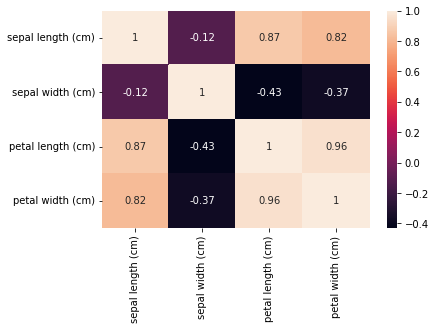

In [3]:
#Q2. 

import numpy as np
from scipy import stats
from sklearn import datasets
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names                           
columns = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = columns
print(iris_df.describe())                                  
print(iris_df.shape)
print(iris_df.dropna())                                    
z = np.abs(stats.zscore(iris_df))
print(z)
Q3 = iris_df.quantile(0.75)
Q1 = iris_df.quantile(0.25)
print(Q3-Q1)
correlation_matrix = iris_df.corr().round(2)
sns.heatmap(data = correlation_matrix,annot = True)
clf = LDA()
clf.fit(X, y)
LDA(n_components=None, priors=None)
print(clf.predict([[-0.8, -1,3,4]]))
